# Advanced_Regression_Assignment

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The data is provided in the csv file below.

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
Which variables are significant in predicting the price of a house
How well those variables describe the price of a house
Also, determine the optimal value of lambda for ridge and lasso regression. 

#### Business Goal

You are required to model the price of houses with the available independent variables. It will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high rewards. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [ ]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Import and inspect data frame

In [60]:
# reading the dataset from .csv file
housing_df = pd.read_csv("train.csv")

In [61]:
# summary of the dataset
print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [62]:
# head of data set
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
# check distribution of data 
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data preparation and EDA

#### Check na values

In [64]:
# let's check number of na values in column which has na values
# As we don't want to do anything on columns having 0 na values 
housing_df.loc[:, housing_df.isnull().any()].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [65]:
## evaluating the percenatage of na values in columns having na values
print(round(100*(housing_df.loc[:, housing_df.isnull().any()].isnull().sum())/len(housing_df.index), 2))

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


#### Understanding the Data Dictionary

Let's check values in each column before imputing data in place of na values

In [66]:
# data distribution in MSZoning column
housing_df['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [67]:
# data distribution in Street column
housing_df['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [68]:
# data distribution in Alley column
housing_df['Alley'].astype('category').value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [69]:
# data distribution in LotShape column
housing_df['LotShape'].astype('category').value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [70]:
# data distribution in LandContour column
housing_df['LandContour'].astype('category').value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [71]:
# data distribution in Utilities column
housing_df['Utilities'].astype('category').value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [72]:
# data distribution in LotConfig column
housing_df['LotConfig'].astype('category').value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [73]:
# data distribution in LandSlope column
housing_df['LandSlope'].astype('category').value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [74]:
# data distribution in Neighborhood column
housing_df['Neighborhood'].astype('category').value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [75]:
# data distribution in Condition1 column
housing_df['Condition1'].astype('category').value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [76]:
# data distribution in Condition2 column
housing_df['Condition2'].astype('category').value_counts()

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [77]:
# data distribution in BldgType column
housing_df['BldgType'].astype('category').value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [78]:
# data distribution in HouseStyle column
housing_df['HouseStyle'].astype('category').value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [79]:
# data distribution in RoofStyle column
housing_df['RoofStyle'].astype('category').value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [80]:
# data distribution in RoofMatl column
housing_df['RoofMatl'].astype('category').value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [81]:
# data distribution in Exterior1st column
housing_df['Exterior1st'].astype('category').value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [82]:
# data distribution in Exterior2nd column
housing_df['Exterior2nd'].astype('category').value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [83]:
# data distribution in MasVnrType column
housing_df['MasVnrType'].astype('category').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [84]:
# data distribution in ExterQual column
housing_df['ExterQual'].astype('category').value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [85]:
# data distribution in ExterCond column
housing_df['ExterCond'].astype('category').value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [86]:
# data distribution in Foundation column
housing_df['Foundation'].astype('category').value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [87]:
# data distribution in BsmtQual column
housing_df['BsmtQual'].astype('category').value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [88]:
# data distribution in BsmtCond column
housing_df['BsmtCond'].astype('category').value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [89]:
# data distribution in BsmtExposure column
housing_df['BsmtExposure'].astype('category').value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [90]:
# data distribution in BsmtFinType1 column
housing_df['BsmtFinType1'].astype('category').value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [91]:
# data distribution in BsmtFinType2 column
housing_df['BsmtFinType2'].astype('category').value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [92]:
# data distribution in Heating column
housing_df['Heating'].astype('category').value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [93]:
# data distribution in HeatingQC column
housing_df['HeatingQC'].astype('category').value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [94]:
# data distribution in CentralAir column
housing_df['CentralAir'].astype('category').value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [95]:
# data distribution in Electrical column
housing_df['Electrical'].astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [96]:
# data distribution in KitchenQual column
housing_df['KitchenQual'].astype('category').value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [97]:
# data distribution in Functional column
housing_df['Functional'].astype('category').value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [98]:
# data distribution in FireplaceQu column
housing_df['FireplaceQu'].astype('category').value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [99]:
# data distribution in GarageType column
housing_df['GarageType'].astype('category').value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [100]:
# data distribution in GarageFinish column
housing_df['GarageFinish'].astype('category').value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [101]:
# data distribution in GarageQual column
housing_df['GarageQual'].astype('category').value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [102]:
## data distribution in GarageCond column
housing_df['GarageCond'].astype('category').value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [103]:
# data distribution in PoolQC column
housing_df['PoolQC'].astype('category').value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [104]:
# data distribution in Fence column
housing_df['Fence'].astype('category').value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [105]:
# data distribution in MiscFeature column
housing_df['MiscFeature'].astype('category').value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [106]:
# data distribution in SaleType column
housing_df['SaleType'].astype('category').value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [107]:
# data distribution in SaleCondition column
housing_df['SaleCondition'].astype('category').value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

#### imputing values in place of na 

In [108]:
## now let's look at the percenatage of null data across columns again before imputing them
print(round(100*(housing_df.loc[:, housing_df.isnull().any()].isnull().sum())/len(housing_df.index), 2))

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


In [109]:
#Imputing values by looking at the data dictionary provided to us and data distribution across different columns
# based on data dictionary na in Alley means 'No alley access'
housing_df.loc[housing_df['Alley'].isnull(),['Alley']] = 'No alley access'
# LotFrontage can never be 0. So imputing it with mean value
housing_df.loc[housing_df['LotFrontage'].isnull(),['LotFrontage']] = housing_df['LotFrontage'].mean()
# based on data dictionary na in MasVnrType means 'none'
housing_df.loc[housing_df['MasVnrType'].isnull(),['MasVnrType']] = 'none'
# based on data dictionary where MasVnrType type is 'none' area will 0
housing_df.loc[housing_df['MasVnrArea'].isnull(),['MasVnrArea']] = 0
# based on data dictionary na in BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 means ''No Basement'
housing_df.loc[housing_df['BsmtQual'].isnull(),['BsmtQual']] = 'No Basement'
housing_df.loc[housing_df['BsmtCond'].isnull(),['BsmtCond']] = 'No Basement'
housing_df.loc[housing_df['BsmtExposure'].isnull(),['BsmtExposure']] = "No Basement"
housing_df.loc[housing_df['BsmtFinType1'].isnull(),['BsmtFinType1']] = 'No Basement'
housing_df.loc[housing_df['BsmtFinType2'].isnull(),['BsmtFinType2']] = 'No Basement'
# based on data dictionary na in FireplaceQu means 'No Fireplace'
housing_df.loc[housing_df['FireplaceQu'].isnull(),['FireplaceQu']] = 'No Fireplace'
# based on data dictionary na in GarageType,GarageFinish,GarageQual,GarageCond means 'No Garage'
housing_df.loc[housing_df['GarageType'].isnull(),['GarageType']] = 'No Garage'
housing_df.loc[housing_df['GarageFinish'].isnull(),['GarageFinish']] = 'No Garage'
housing_df.loc[housing_df['GarageQual'].isnull(),['GarageQual']] = 'No Garage'
housing_df.loc[housing_df['GarageCond'].isnull(),['GarageCond']] = 'No Garage'
# based on data dictionary na in PoolQC means 'No Pool'
housing_df.loc[housing_df['PoolQC'].isnull(),['PoolQC']] = 'No Pool'
# based on data dictionary na in Fence means 'No Fence'
housing_df.loc[housing_df['Fence'].isnull(),['Fence']] = 'No Fence'
# based on data dictionary na in MiscFeature means 'none'
housing_df.loc[housing_df['MiscFeature'].isnull(),['MiscFeature']] = 'none'
# impute GarageYrBlt with 2019 so that while calculating age it will it will turn to 0
# age = 2019-2019 = 0
housing_df.loc[housing_df['GarageYrBlt'].isnull(),['GarageYrBlt']] = 2019
# impute electrical column with SBrkr as it is the most occuring value
housing_df.loc[housing_df['Electrical'].isnull(),['Electrical']] = "SBrkr"

In [110]:
## Let's check percentage of null values again after imputation
# You won't see any data now as all the columns are imputed and 
# there is no column with null values
print(round(100*(housing_df.loc[:, housing_df.isnull().any()].isnull().sum())/len(housing_df.index), 2))

Series([], dtype: float64)


#### drop duplicates

In [111]:
# Let's drop duplicate columns if any present in data set 
housing_df = housing_df.drop_duplicates()
housing_df.shape

(1460, 81)

#### Drop less relevant columns

In [112]:
# Let's check number of unique entries in each column
housing_df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [113]:
# based on data distribution in each column seen earlier 
# We have found out that 'Street','Utilities','PoolQC' have very low variance 
# And Id column has all unique values
# So let's drop these columns as they won't be that usefull for analysis
housing_df = housing_df.drop(['Street','Utilities','PoolQC','Id'], axis=1)

#### Change data type

In [114]:
# change data type for MSSubClass to object as it is categorical variable
housing_df[['MSSubClass']] = housing_df[['MSSubClass']].astype('object')

In [115]:
# cross check if data type for MSSubClass has been changed
print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

### Check pairplot and heatmap

In [116]:
# let's take all numeric (float and int) variables in the dataset
# to check pairplot and heatmap
housing_df_numeric = housing_df.select_dtypes(include=['float64', 'int64'])
housing_df_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [120]:
# correlation matrix
cor = housing_df_numeric.corr()
cor

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.178699,0.215828,0.043340,0.122156,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.178699,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.122156,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


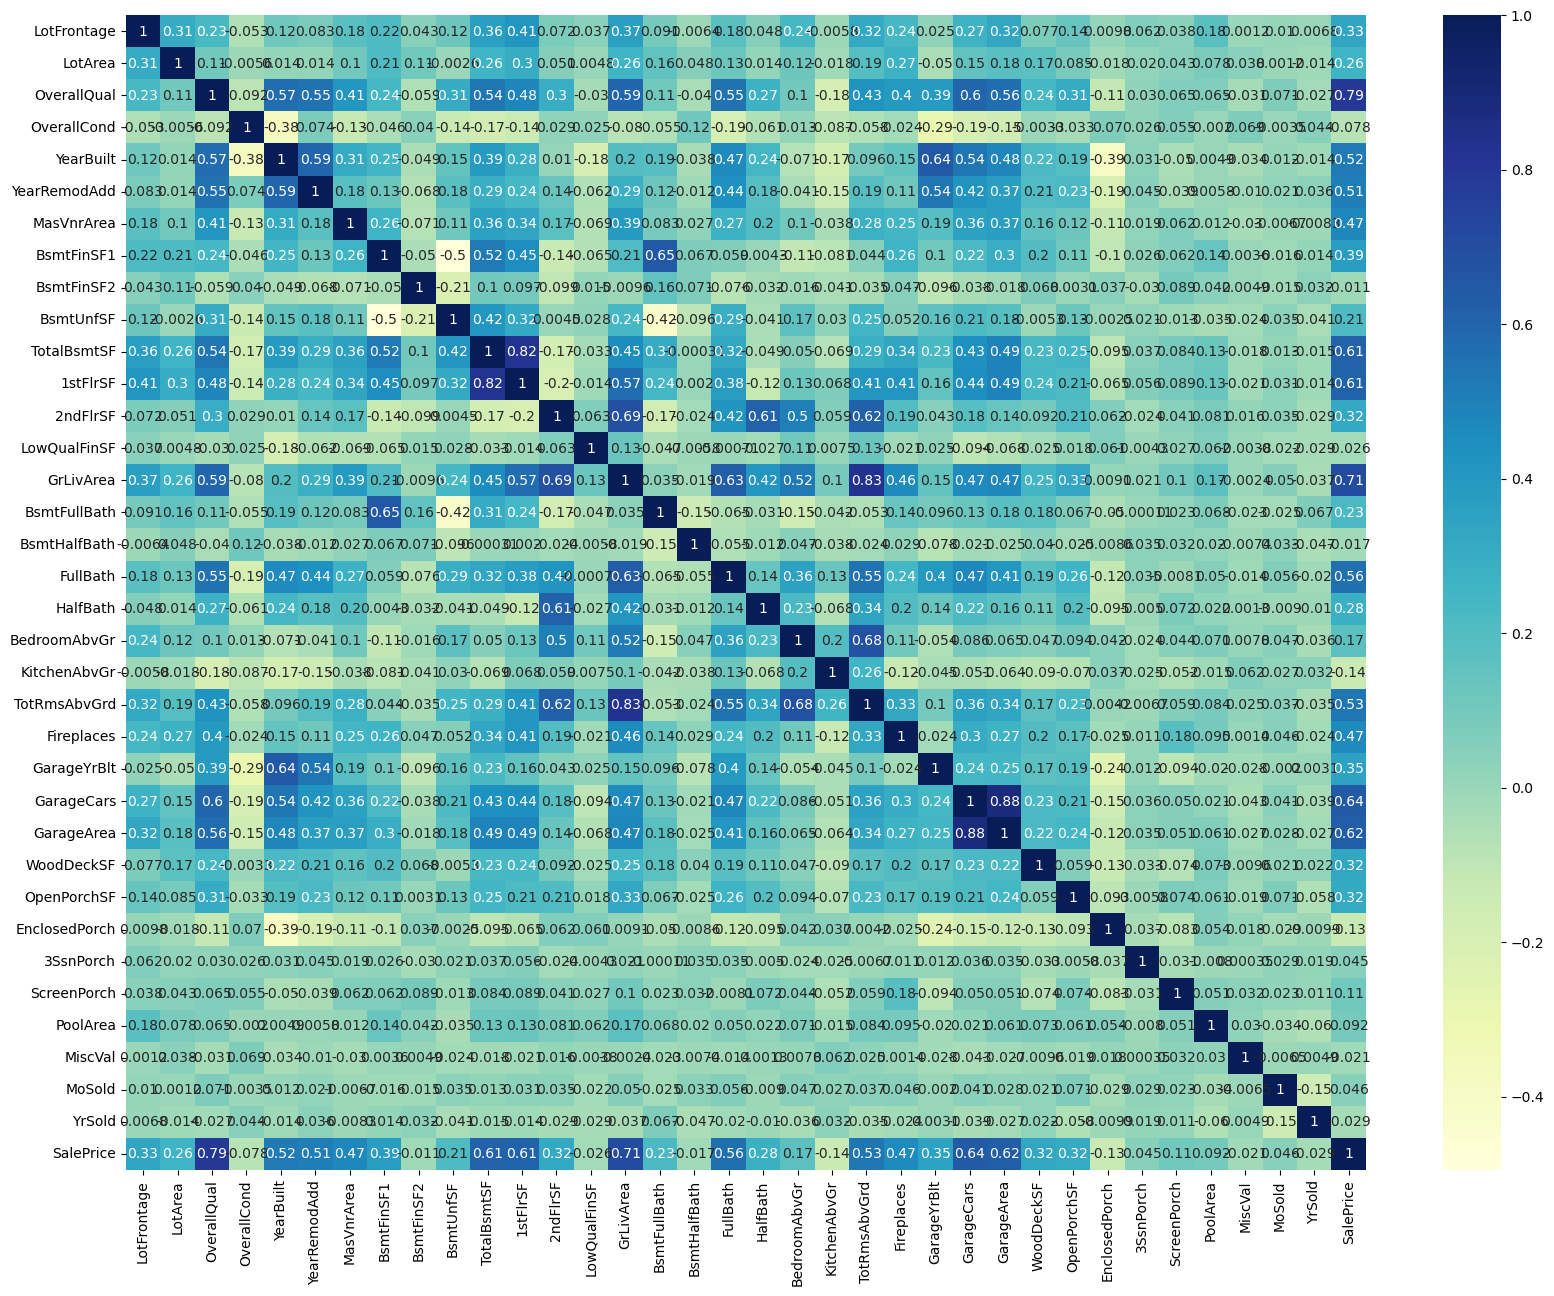

In [121]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize = (20, 15))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### Outlier treament

In [122]:
# now let's drop some columns from numeric data frame to inspect outlier in each column
# As inspecting outlier on these column's doesn't make any sense
housing_df_numeric = housing_df_numeric.drop(['GarageYrBlt','YearBuilt','YrSold',
                                              'YearRemodAdd','MoSold','BsmtFullBath',
                                              'BsmtHalfBath','FullBath','HalfBath',
                                              'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
                                              'OverallQual','OverallQual','GarageCars',
                                              'OverallCond','Fireplaces'], axis=1)

In [123]:
# Check data distribution in different columns to check outliers
housing_df_numeric.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,22.024023,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,70.049958,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


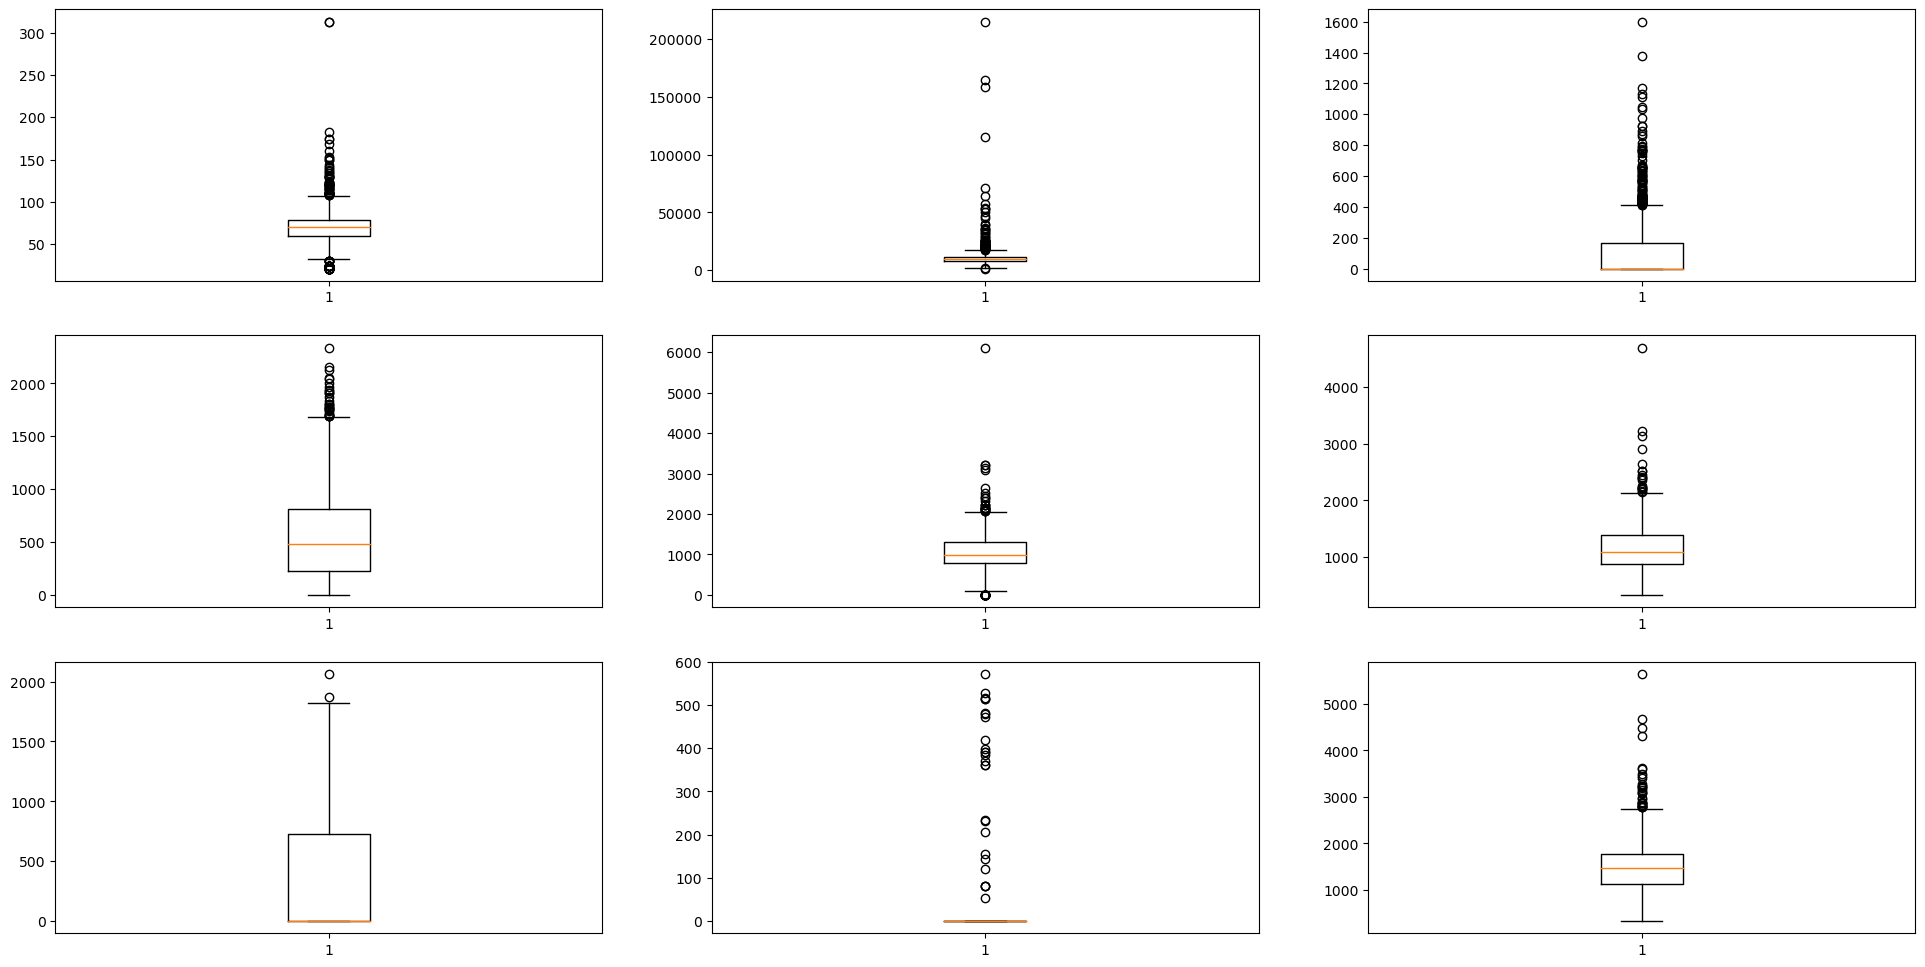

In [124]:
plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
plt.boxplot(housing_df.LotFrontage)
plt.subplot(3,3,2)
plt.boxplot(housing_df.LotArea)
plt.subplot(3,3,3)
plt.boxplot(housing_df.MasVnrArea)
plt.subplot(3,3,4)
plt.boxplot(housing_df.BsmtUnfSF)
plt.subplot(3,3,5)
plt.boxplot(housing_df.TotalBsmtSF)
plt.subplot(3,3,6)
plt.boxplot(housing_df['1stFlrSF'])
plt.subplot(3,3,7)
plt.boxplot(housing_df['2ndFlrSF'])
plt.subplot(3,3,8)
plt.boxplot(housing_df.LowQualFinSF)
plt.subplot(3,3,9)
plt.boxplot(housing_df.GrLivArea)
plt.show()

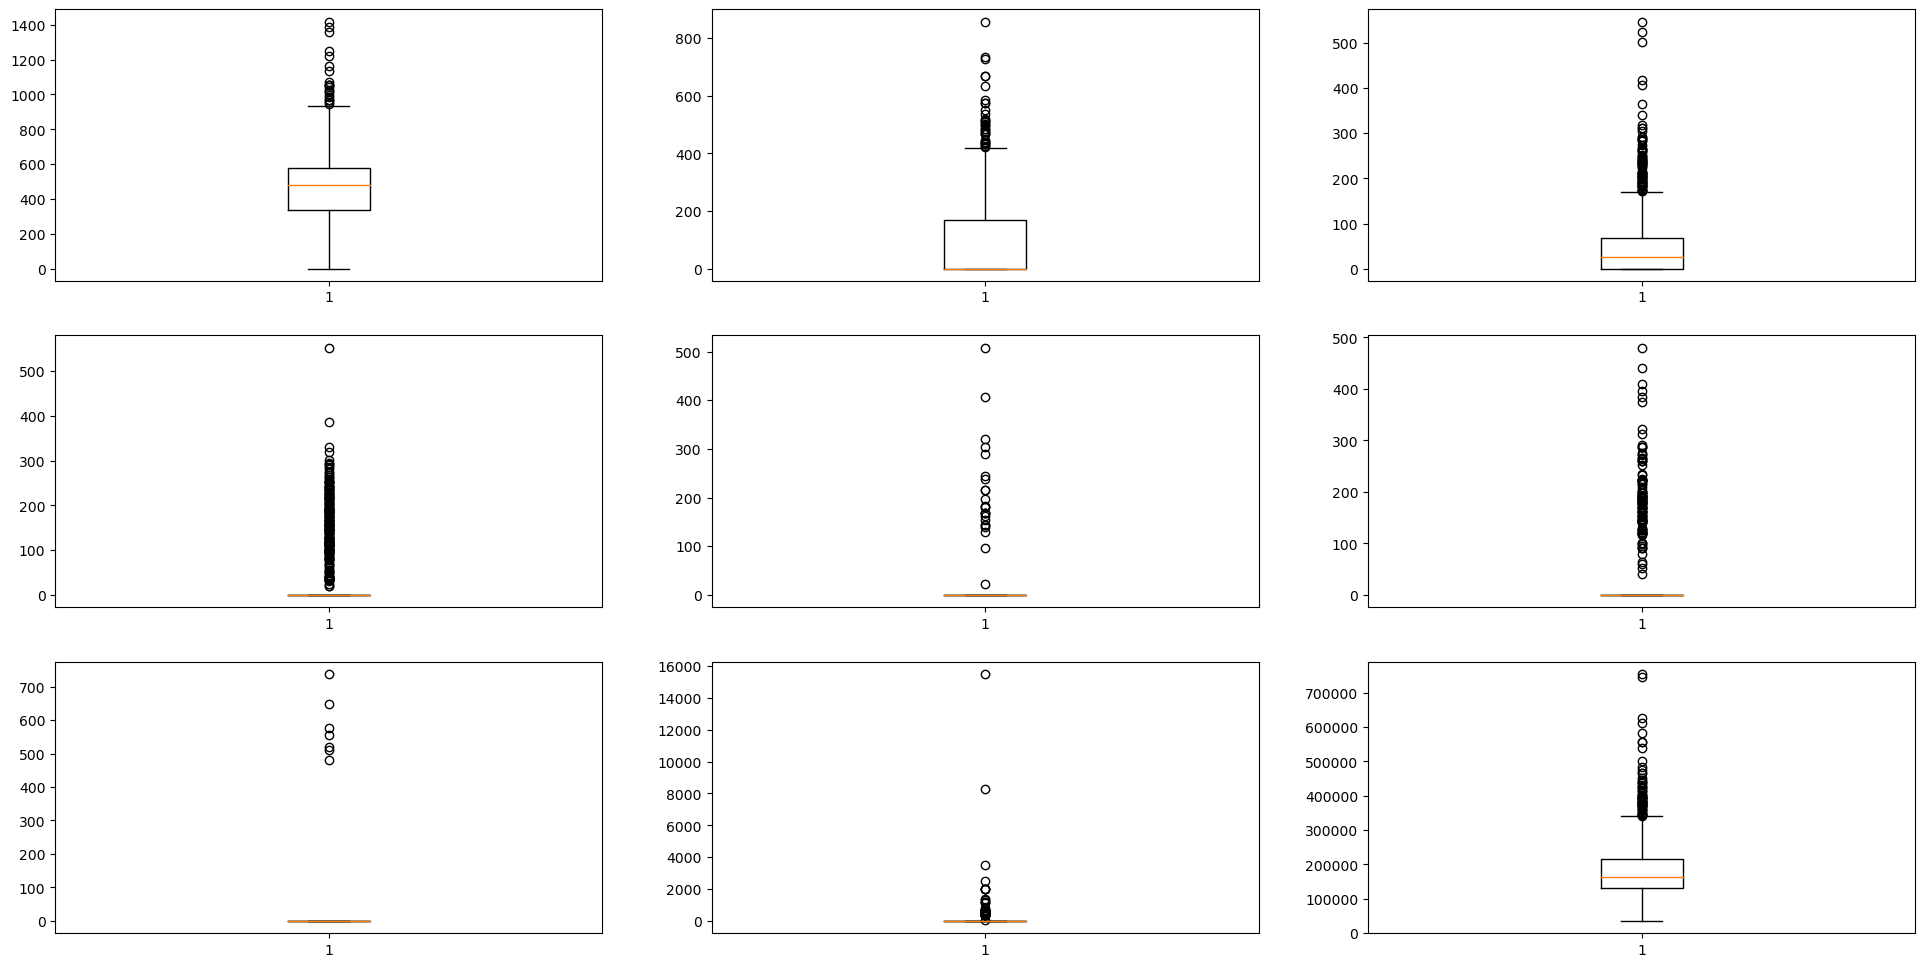

In [125]:
plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
plt.boxplot(housing_df.GarageArea)
plt.subplot(3,3,2)
plt.boxplot(housing_df.WoodDeckSF)
plt.subplot(3,3,3)
plt.boxplot(housing_df.OpenPorchSF)
plt.subplot(3,3,4)
plt.boxplot(housing_df.EnclosedPorch)
plt.subplot(3,3,5)
plt.boxplot(housing_df['3SsnPorch'])
plt.subplot(3,3,6)
plt.boxplot(housing_df.ScreenPorch)
plt.subplot(3,3,7)
plt.boxplot(housing_df.PoolArea)
plt.subplot(3,3,8)
plt.boxplot(housing_df.MiscVal)
plt.subplot(3,3,9)
plt.boxplot(housing_df.SalePrice)
plt.show()

Now, as per data distribution and box plot there are outlier's in data but we can't treat outlier's in all columns as we have a small data set and plus outlier's in some columns make sense. So we will do outlier treatment for few columns only

Below we have done outlier treatment for LotFrontage, LotArea, PoolArea, MiscVal

In [126]:
# outlier treatment for LotFrontage
Q1 = housing_df.LotFrontage.quantile(0.25)
Q3 = housing_df.LotFrontage.quantile(0.75)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df.LotFrontage >= Q1 - 1.5*IQR) & (housing_df.LotFrontage <= Q3 + 1.5*IQR)]

In [127]:
# outlier treatment for LotArea
Q1 = housing_df.LotArea.quantile(0.25)
Q3 = housing_df.LotArea.quantile(0.75)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df.LotArea >= Q1 - 1.5*IQR) & (housing_df.LotArea <= Q3 + 1.5*IQR)]

In [128]:
# outlier treatment for PoolArea
Q1 = housing_df.PoolArea.quantile(0.25)
Q3 = housing_df.PoolArea.quantile(0.75)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df.PoolArea >= Q1 - 1.5*IQR) & (housing_df.PoolArea <= Q3 + 1.5*IQR)]

In [129]:
# outlier treatment for MiscVal
Q1 = housing_df.MiscVal.quantile(0.25)
Q3 = housing_df.MiscVal.quantile(0.75)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df.MiscVal >= Q1 - 1.5*IQR) & (housing_df.MiscVal <= Q3 + 1.5*IQR)]

In [130]:
# Check number of row retained after outlier treatment
housing_df.shape

(1238, 77)

### Derive columns from original columns

In [131]:
# We can derive age using year columns
# derive house age = 2019 - year build
housing_df["house_age"] = 2019 - housing_df["YearBuilt"]
# derive house age when sold in month as we have month and year both for sold house
housing_df["house_age_when_sold_in_month"] = (((housing_df["YrSold"]-1) - housing_df["YearBuilt"])*12) + housing_df["MoSold"]
# derive garage age = 2019 - year build
housing_df["garage_age"] = 2019 - housing_df["GarageYrBlt"]
# derive gap b/w house build and remodel = YearRemodAdd - year build
housing_df["gap_between_build_remodel"] = housing_df["YearRemodAdd"] - housing_df["YearBuilt"]

In [132]:
# check data frame after deriving columns
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,house_age,house_age_when_sold_in_month,garage_age,gap_between_build_remodel
0,60,RL,65.0,8450,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,...,0,2,2008,WD,Normal,208500,16,50,16.0,0
1,20,RL,80.0,9600,No alley access,Reg,Lvl,FR2,Gtl,Veenker,...,0,5,2007,WD,Normal,181500,43,365,43.0,0
2,60,RL,68.0,11250,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,...,0,9,2008,WD,Normal,223500,18,81,18.0,1
3,70,RL,60.0,9550,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,...,0,2,2006,WD,Abnorml,140000,104,1082,21.0,55
4,60,RL,84.0,14260,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,...,0,12,2008,WD,Normal,250000,19,96,19.0,0


In [133]:
# Drop original year and month columns after deriving columns
housing_df = housing_df.drop(['GarageYrBlt','YearBuilt','YrSold','YearRemodAdd','MoSold'], axis=1)

In [134]:
housing_df.shape

(1238, 76)

## Data preparation for model building

In [135]:
# split into X and y
X = housing_df.drop(['SalePrice'], axis=1)
y = housing_df['SalePrice']

In [136]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,house_age,house_age_when_sold_in_month,garage_age,gap_between_build_remodel
0,60,RL,65.0,8450,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,...,0,No Fence,none,0,WD,Normal,16,50,16.0,0
1,20,RL,80.0,9600,No alley access,Reg,Lvl,FR2,Gtl,Veenker,...,0,No Fence,none,0,WD,Normal,43,365,43.0,0
2,60,RL,68.0,11250,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,...,0,No Fence,none,0,WD,Normal,18,81,18.0,1
3,70,RL,60.0,9550,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,...,0,No Fence,none,0,WD,Abnorml,104,1082,21.0,55
4,60,RL,84.0,14260,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,...,0,No Fence,none,0,WD,Normal,19,96,19.0,0


In [137]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [138]:
# creating dummy variables for yes/no categorical variables
# we'll map yes to 1 and no to 0
binary_vars_list =  ['CentralAir']

# defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# applying the function to column with yes /no data
X[binary_vars_list] = X[binary_vars_list].apply(binary_map)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,house_age,house_age_when_sold_in_month,garage_age,gap_between_build_remodel
0,60,RL,65.0,8450,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,...,0,No Fence,none,0,WD,Normal,16,50,16.0,0
1,20,RL,80.0,9600,No alley access,Reg,Lvl,FR2,Gtl,Veenker,...,0,No Fence,none,0,WD,Normal,43,365,43.0,0
2,60,RL,68.0,11250,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,...,0,No Fence,none,0,WD,Normal,18,81,18.0,1
3,70,RL,60.0,9550,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,...,0,No Fence,none,0,WD,Abnorml,104,1082,21.0,55
4,60,RL,84.0,14260,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,...,0,No Fence,none,0,WD,Normal,19,96,19.0,0


In [139]:
# seperate all categorical variables to create dummy variables
housing_df_categorical = X.select_dtypes(include=['object'])
housing_df_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,No Fireplace,Attchd,RFn,TA,TA,Y,No Fence,none,WD,Normal
1,20,RL,No alley access,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,Y,No Fence,none,WD,Normal
2,60,RL,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,Y,No Fence,none,WD,Normal
3,70,RL,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,Y,No Fence,none,WD,Abnorml
4,60,RL,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,Y,No Fence,none,WD,Normal


In [140]:
# convert categorical variables into dummies
housing_df_dummies = pd.get_dummies(housing_df_categorical, drop_first=True)
housing_df_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [141]:
# drop original categorical variables after creating dummies
X = X.drop(list(housing_df_categorical.columns), axis=1)

In [142]:
# concat dummy variables with X
X = pd.concat([X, housing_df_dummies], axis=1)

In [143]:
X.shape

(1238, 255)

In [144]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,706,0,150,856,1,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,0.0,978,0,284,1262,1,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,162.0,486,0,434,920,1,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,0.0,216,0,540,756,1,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,350.0,655,0,490,1145,1,...,0,0,0,0,1,0,0,0,1,0


In [145]:
# Scale data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_var = X.columns
X[scale_var] = scaler.fit_transform(X[scale_var])

In [146]:
# Check data after scaling
X.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,...,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,0.490261,0.486092,0.565967,0.571789,0.061637,0.197190,0.028835,0.247771,0.328368,0.930533,...,0.003231,0.004039,0.086430,0.002423,0.863489,0.003231,0.007270,0.014540,0.818255,0.088045
std,0.194104,0.193634,0.152334,0.138228,0.107650,0.193850,0.102369,0.190541,0.126750,0.254349,...,0.056773,0.063449,0.281111,0.049187,0.343469,0.056773,0.084987,0.119749,0.385790,0.283475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.373333,0.366691,0.444444,0.500000,0.000000,0.000000,0.000000,0.102419,0.252027,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.507333,0.481141,0.555556,0.500000,0.000000,0.174132,0.000000,0.208690,0.309576,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.613333,0.608950,0.666667,0.625000,0.100000,0.324954,0.000000,0.347817,0.397848,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model building

In [147]:
# split data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [148]:
# let's build a Linear regression model first
from sklearn import metrics
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9450764872898124

In [149]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-2985069696447246.0

In [150]:
# model coefficients
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -21166.955),
 ('LotFrontage', 3413.423),
 ('LotArea', 33332.848),
 ('OverallQual', 65872.126),
 ('OverallCond', 46541.319),
 ('MasVnrArea', 19927.414),
 ('BsmtFinSF1', 4.27016678651163e+16),
 ('BsmtFinSF2', 2.876702853433749e+16),
 ('BsmtUnfSF', 4.559008049945268e+16),
 ('TotalBsmtSF', -6.2569262877169144e+16),
 ('CentralAir', 70.5),
 ('1stFlrSF', 2836157385415183.0),
 ('2ndFlrSF', 1578800811320746.0),
 ('LowQualFinSF', 517446820831422.0),
 ('GrLivArea', -3050780214371375.0),
 ('BsmtFullBath', 767.0),
 ('BsmtHalfBath', 80.812),
 ('FullBath', 12200.0),
 ('HalfBath', 5015.0),
 ('BedroomAbvGr', -35658.5),
 ('KitchenAbvGr', -19370.0),
 ('TotRmsAbvGrd', 12508.188),
 ('Fireplaces', 11432.875),
 ('GarageCars', 27374.0),
 ('GarageArea', 2532.5),
 ('WoodDeckSF', 8911.5),
 ('OpenPorchSF', 6800.0),
 ('EnclosedPorch', 13282.0),
 ('3SsnPorch', 15079.0),
 ('ScreenPorch', 11333.75),
 ('PoolArea', -2744013787854428.0),
 ('MiscVal', 1.2134892600628124e+16),
 ('house_age', -4862.0),
 ('hou

### Lasso regression

In [151]:
# lasso regression without tuning hyper parameter
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9450703893776525
0.9174166858400342


In [152]:
# lasso model parameters without tuning hyper parameter
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -21026.866),
 ('LotFrontage', 3382.319),
 ('LotArea', 33398.338),
 ('OverallQual', 65728.164),
 ('OverallCond', 46517.257),
 ('MasVnrArea', 19824.279),
 ('BsmtFinSF1', 76644.992),
 ('BsmtFinSF2', 28268.186),
 ('BsmtUnfSF', 31800.387),
 ('TotalBsmtSF', 32398.632),
 ('CentralAir', 145.574),
 ('1stFlrSF', 107207.986),
 ('2ndFlrSF', 79700.788),
 ('LowQualFinSF', 15196.791),
 ('GrLivArea', 25492.748),
 ('BsmtFullBath', 651.844),
 ('BsmtHalfBath', 67.339),
 ('FullBath', 12002.83),
 ('HalfBath', 4901.651),
 ('BedroomAbvGr', -35530.667),
 ('KitchenAbvGr', -19548.65),
 ('TotRmsAbvGrd', 12728.818),
 ('Fireplaces', 11266.472),
 ('GarageCars', 27438.078),
 ('GarageArea', 2507.421),
 ('WoodDeckSF', 8818.183),
 ('OpenPorchSF', 6965.536),
 ('EnclosedPorch', 13420.314),
 ('3SsnPorch', 14973.139),
 ('ScreenPorch', 11280.102),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('house_age', -29952.139),
 ('house_age_when_sold_in_month', -56684.825),
 ('garage_age', 885.517),
 ('gap_between_build_remo

In [153]:
# Now let's do k fold with r2 score and tune hyper parameter
# grid search CV
from sklearn.model_selection import KFold
# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200]},
             return_train_score=True, scoring='r2', verbose=1)

In [154]:
# results data frame 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.295601,0.024161,0.007205,0.000819,0.0001,{'alpha': 0.0001},0.892857,0.904077,0.884765,0.887166,...,0.890666,0.007350,27,0.946465,0.945466,0.947946,0.950362,0.954408,0.948929,0.003197
1,0.333401,0.044699,0.007319,0.001218,0.001,{'alpha': 0.001},0.892866,0.904090,0.884771,0.887172,...,0.890674,0.007354,26,0.946465,0.945466,0.947946,0.950362,0.954408,0.948929,0.003197
2,0.361883,0.095416,0.008015,0.001049,0.01,{'alpha': 0.01},0.892957,0.904170,0.884831,0.887231,...,0.890738,0.007368,25,0.946465,0.945466,0.947945,0.950362,0.954408,0.948929,0.003197
3,0.323068,0.038618,0.007730,0.000518,0.05,{'alpha': 0.05},0.893377,0.904390,0.885156,0.887422,...,0.890988,0.007388,24,0.946465,0.945464,0.947944,0.950362,0.954408,0.948929,0.003197
4,0.377699,0.111520,0.008261,0.001514,0.1,{'alpha': 0.1},0.893868,0.904640,0.885530,0.887454,...,0.891241,0.007430,23,0.946464,0.945462,0.947942,0.950361,0.954407,0.948927,0.003198


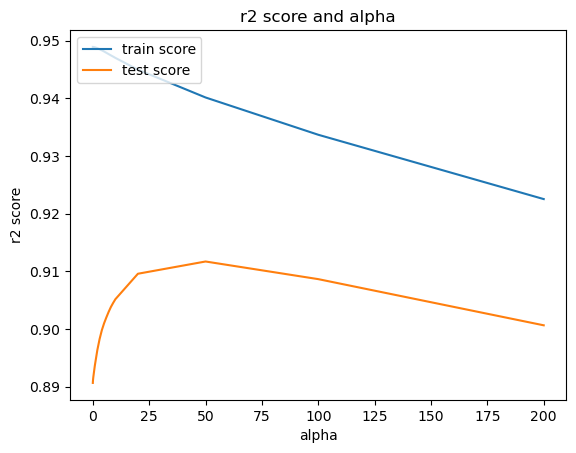

In [155]:
# plot to choose optimal value of aplha / hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [156]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [157]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.340099,0.047658,0.007826,0.000401,0.0001,{'alpha': 0.0001},-15342.554915,-17622.200750,-16201.787657,-15262.334365,...,-16755.070293,1548.991231,27,-11407.971762,-11021.045513,-11352.706080,-11344.619475,-10243.022083,-11073.872983,437.213338
1,0.393842,0.117250,0.008127,0.003229,0.001,{'alpha': 0.001},-15342.322165,-17623.030466,-16201.358070,-15261.903766,...,-16754.933803,1549.100058,26,-11407.968991,-11021.044136,-11352.721448,-11344.626826,-10243.032744,-11073.878829,437.211766
2,0.345114,0.042057,0.008767,0.002527,0.01,{'alpha': 0.01},-15339.079657,-17621.644530,-16197.010350,-15257.597771,...,-16751.682081,1549.681403,25,-11407.963738,-11021.117878,-11353.026366,-11344.840196,-10243.296694,-11074.048974,437.174197
3,0.354338,0.049345,0.007880,0.000842,0.05,{'alpha': 0.05},-15322.009079,-17598.717207,-16174.836882,-15242.871488,...,-16734.274040,1551.260612,24,-11408.227998,-11021.658353,-11354.482172,-11345.809363,-10244.617318,-11074.959041,437.005633
4,0.581260,0.409598,0.010042,0.003338,0.1,{'alpha': 0.1},-15300.836718,-17574.524118,-16147.875283,-15239.524787,...,-16716.639613,1550.844053,23,-11409.028172,-11022.477748,-11356.296893,-11347.245360,-10246.451226,-11076.299880,436.821132


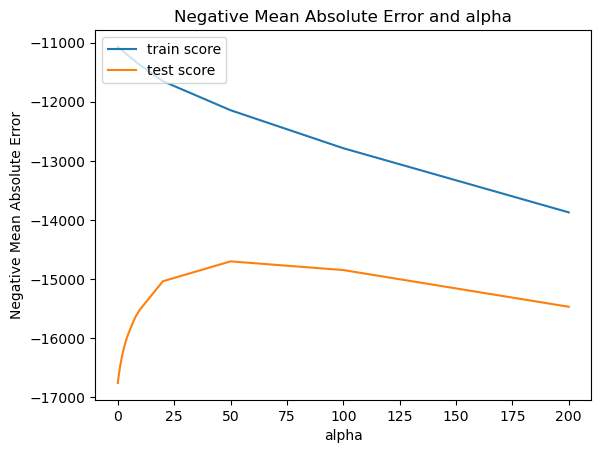

In [158]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [159]:
# model with optimal alpha = 50
# lasso regression
lm = Lasso(alpha=50)
lm.fit(X_train, y_train)


# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9372405328256925
0.9254664123086984


In [160]:
# lasso model parameters with alpha = 50
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 34537.742),
 ('LotFrontage', 3872.558),
 ('LotArea', 29770.784),
 ('OverallQual', 72106.058),
 ('OverallCond', 48369.881),
 ('MasVnrArea', 15037.914),
 ('BsmtFinSF1', 40212.291),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 61327.238),
 ('CentralAir', 1114.809),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -12276.386),
 ('GrLivArea', 155946.426),
 ('BsmtFullBath', 1772.246),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 9646.831),
 ('HalfBath', 6139.135),
 ('BedroomAbvGr', -20570.459),
 ('KitchenAbvGr', -9607.097),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 7345.959),
 ('GarageCars', 23977.678),
 ('GarageArea', 4294.87),
 ('WoodDeckSF', 5681.621),
 ('OpenPorchSF', 4470.058),
 ('EnclosedPorch', 2942.501),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 6203.506),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('house_age', -41417.318),
 ('house_age_when_sold_in_month', -23876.709),
 ('garage_age', -370.002),
 ('gap_between_build_remodel', 9813.314),
 ('MSSubClass_30', 0.

### Ridge Regression

In [161]:
# ridge regression without tuning hyper parameter
lm = Ridge(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9450776066175754
0.9174397805219932


In [162]:
ridge.fit(X_train, y_train)
ridge.coef_

NameError: name 'ridge' is not defined

In [163]:
# Now let's do k fold with r2 score and tune hyper parameter

# list of alphas to tune
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [164]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021896,0.003878,0.010048,0.002061,0.001,{'alpha': 0.001},0.907217,0.872546,0.881687,0.858353,...,0.881639,0.016277,5,0.945724,0.951815,0.948995,0.953377,0.946692,0.949321,0.002920
1,0.021611,0.003195,0.009759,0.002475,0.01,{'alpha': 0.01},0.908513,0.874109,0.884074,0.859853,...,0.883215,0.016182,4,0.945716,0.951809,0.948970,0.953369,0.946675,0.949308,0.002922
2,0.018796,0.001894,0.007831,0.000604,1.0,{'alpha': 1.0},0.920342,0.901581,0.915891,0.873974,...,0.903368,0.016217,2,0.942769,0.948502,0.944992,0.950582,0.943936,0.946156,0.002927
3,0.019418,0.003953,0.007824,0.000401,5.0,{'alpha': 5.0},0.913246,0.907666,0.925983,0.867103,...,0.903531,0.019711,1,0.932826,0.937906,0.933739,0.941259,0.934798,0.936106,0.003094
4,0.018083,0.001490,0.007125,0.000381,10.0,{'alpha': 10.0},0.901223,0.904704,0.923781,0.854455,...,0.895874,0.022810,3,0.922252,0.926842,0.922133,0.931534,0.925148,0.925582,0.003470


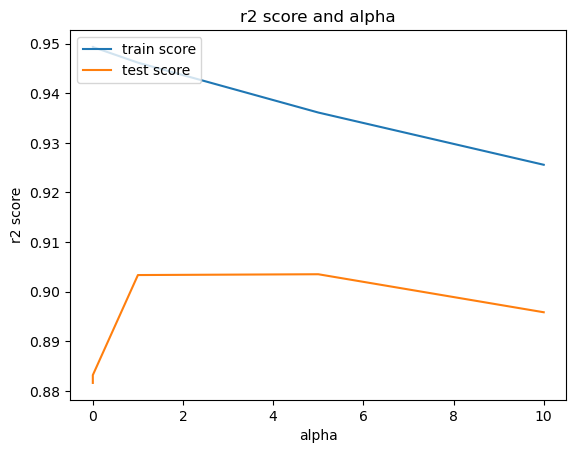

In [165]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [166]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter

# list of alphas to tune
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [167]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018263,0.002399,0.007438,0.000912,0.001,{'alpha': 0.001},-15800.068603,-18045.945189,-18958.830971,-17516.493642,...,-17393.313824,1094.532190,5,-11160.687358,-10839.216631,-10663.174751,-11019.785288,-11583.631076,-11053.299021,313.667253
1,0.017476,0.002479,0.008546,0.001080,0.01,{'alpha': 0.01},-15695.675682,-17929.331030,-18763.189016,-17408.384244,...,-17266.510669,1067.774537,4,-11164.921866,-10843.313961,-10670.943747,-11020.763731,-11584.954717,-11056.979604,311.896628
2,0.016153,0.001061,0.007128,0.000368,1.0,{'alpha': 1.0},-14580.124813,-15418.828566,-15888.591967,-16212.234627,...,-15414.165577,592.282637,2,-11470.572016,-11223.173063,-11077.790558,-11295.377967,-11805.687510,-11374.520223,249.939645
3,0.015556,0.000699,0.007731,0.001228,5.0,{'alpha': 5.0},-14841.211005,-14962.018781,-15036.619673,-16477.489639,...,-15205.606554,645.492220,1,-12469.100395,-12210.954296,-12196.212304,-12311.919994,-12585.391983,-12354.715794,150.942072
4,0.017653,0.001528,0.008403,0.001095,10.0,{'alpha': 10.0},-15500.441119,-15179.573242,-15199.015982,-17050.404943,...,-15676.844216,698.955694,3,-13500.447135,-13238.037927,-13271.489934,-13220.855943,-13449.419844,-13336.050157,115.691987


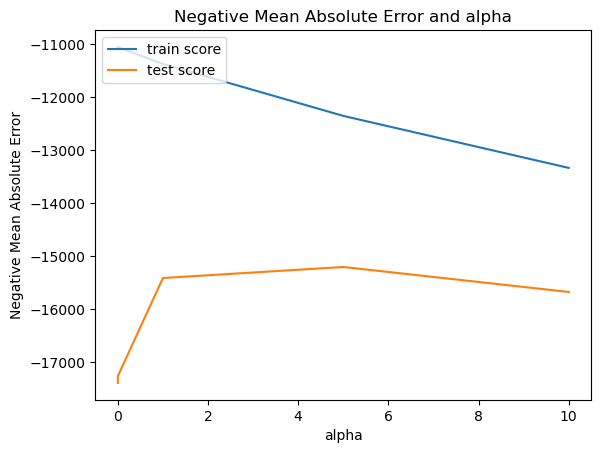

In [168]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [169]:
# model with optimal alpha = 4
# ridge regression
lm = Ridge(alpha=4)
lm.fit(X_train, y_train)


# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9371096095852764
0.9253982765709686


In [170]:
# coefficients for optimal value of alpha = 4
ridge.fit(X_train, y_train)
ridge.coef_

array([ 5.36495726e+03,  3.00042535e+04,  6.06428746e+04,  4.08426819e+04,
        1.95751766e+04,  5.18426556e+04,  9.84250408e+03,  1.15809135e+04,
        4.83445401e+04,  2.64213150e+03,  5.44882163e+04,  4.13710985e+04,
       -4.74095392e+03,  7.12606855e+04,  3.17078527e+03, -8.89086741e+02,
        1.67677150e+04,  8.66564792e+03, -2.37233103e+04, -1.44583696e+04,
        1.53065193e+04,  1.24817090e+04,  2.29861612e+04,  1.07298259e+04,
        8.32798412e+03,  8.45710539e+03,  8.55675071e+03,  1.22215619e+04,
        1.01632000e+04,  0.00000000e+00,  0.00000000e+00, -3.18596767e+04,
       -3.38708416e+04,  1.64788256e+03,  1.34544582e+04,  8.98904638e+02,
        7.57258605e+03,  3.57013131e+03,  2.93797917e+03,  3.46979097e+03,
        3.04556089e+03, -1.28469968e+03, -3.02842059e+03, -1.11131683e+03,
       -8.85341139e+03, -4.63554478e+03, -1.22793720e+04, -1.03058649e+03,
       -4.62215322e+03,  2.53505633e+04,  1.33964456e+04,  1.02104241e+04,
        7.65069834e+03,  

### Ridge regression after variable shrinkage done by lasso

In [171]:
# let's take new X with all variables whose coefficient is not zero after lasso regression
X_new = X[['LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','TotalBsmtSF',
'CentralAir','LowQualFinSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
 'KitchenAbvGr','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
 'EnclosedPorch','ScreenPorch','house_age','house_age_when_sold_in_month','garage_age',
'gap_between_build_remodel','MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_90',
'MSSubClass_120','MSSubClass_160','MSZoning_FV','MSZoning_RL','MSZoning_RM',
 'Alley_No alley access','LotShape_Reg','LandContour_Low','LotConfig_CulDSac','LotConfig_FR2',
 'LotConfig_Inside','LandSlope_Mod','Neighborhood_BrkSide','Neighborhood_CollgCr',
 'Neighborhood_Crawfor','Neighborhood_Edwards','Neighborhood_Gilbert','Neighborhood_Mitchel',
'Neighborhood_NAmes','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_NridgHt',
'Neighborhood_OldTown','Neighborhood_StoneBr','Neighborhood_Timber','Condition1_Feedr',
 'Condition1_Norm','Condition1_PosA','Condition1_PosN','Condition1_RRAe','BldgType_2fmCon',
'BldgType_Duplex','BldgType_Twnhs','BldgType_TwnhsE','HouseStyle_1Story','HouseStyle_2.5Fin',
'HouseStyle_2.5Unf','HouseStyle_2Story','HouseStyle_SFoyer','RoofStyle_Gable',
 'RoofStyle_Mansard','Exterior1st_BrkFace','Exterior1st_HdBoard','Exterior1st_MetalSd',
'Exterior1st_Plywood','Exterior1st_Wd Sdng','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng','Exterior2nd_CmentBd','Exterior2nd_Plywood','Exterior2nd_Stucco',
'Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','Exterior2nd_Wd Shng','MasVnrType_None',
 'MasVnrType_Stone','ExterQual_Fa','ExterQual_Gd','ExterQual_TA','ExterCond_Gd',
 'Foundation_PConc','BsmtQual_Fa','BsmtQual_Gd','BsmtQual_TA','BsmtExposure_Gd',
 'BsmtExposure_No','BsmtFinType1_BLQ','BsmtFinType1_GLQ','BsmtFinType1_LwQ','BsmtFinType1_Rec',
'BsmtFinType1_Unf','BsmtFinType2_LwQ','BsmtFinType2_Unf','Heating_GasA','HeatingQC_Fa',
'HeatingQC_Gd','HeatingQC_TA','Electrical_FuseF','KitchenQual_Fa','KitchenQual_Gd',
 'KitchenQual_TA','Functional_Mod','Functional_Typ','FireplaceQu_Fa','FireplaceQu_Gd',
 'FireplaceQu_Po','GarageType_Attchd','GarageType_BuiltIn','GarageType_Detchd',
 'GarageType_No Garage','GarageFinish_RFn','GarageQual_Fa','GarageQual_Gd','GarageQual_No Garage',
'GarageCond_Fa','GarageCond_No Garage','PavedDrive_P','PavedDrive_Y','Fence_GdWo','Fence_MnPrv',
 'Fence_No Fence','SaleType_WD','SaleCondition_Alloca','SaleCondition_Family',
 'SaleCondition_Normal','SaleCondition_Partial']]


In [172]:
# check shape for new X
X_new.shape

(1238, 137)

In [173]:
# Check data distribution for new X to check if all the data is scaled 
X_new.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,TotalBsmtSF,CentralAir,LowQualFinSF,GrLivArea,...,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_No Fence,SaleType_WD,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,...,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,0.490261,0.486092,0.565967,0.571789,0.061637,0.197190,0.328368,0.930533,0.009690,0.372755,...,0.018578,0.920032,0.038772,0.109855,0.806947,0.863489,0.007270,0.014540,0.818255,0.088045
std,0.194104,0.193634,0.152334,0.138228,0.107650,0.193850,0.126750,0.254349,0.086552,0.154419,...,0.135085,0.271353,0.193130,0.312835,0.394854,0.343469,0.084987,0.119749,0.385790,0.283475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.373333,0.366691,0.444444,0.500000,0.000000,0.000000,0.252027,1.000000,0.000000,0.254176,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,0.507333,0.481141,0.555556,0.500000,0.000000,0.174132,0.309576,1.000000,0.000000,0.360424,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.613333,0.608950,0.666667,0.625000,0.100000,0.324954,0.397848,1.000000,0.000000,0.460649,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [174]:
# Split test and train again using new X
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [177]:
# Now let's do k fold with r2 score and tune hyper parameter
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [178]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013247,0.003209,0.006332,0.000684,0.001,{'alpha': 0.001},0.928629,0.909113,0.923380,0.883422,...,0.912882,0.016056,3,0.939995,0.944980,0.940938,0.947666,0.940922,0.942900,0.002941
1,0.009478,0.001227,0.005286,0.000630,0.01,{'alpha': 0.01},0.928664,0.909270,0.923763,0.883624,...,0.913095,0.016058,2,0.939995,0.944979,0.940928,0.947663,0.940916,0.942896,0.002942
2,0.008649,0.000796,0.005641,0.000236,1.0,{'alpha': 1.0},0.928083,0.913118,0.928790,0.881797,...,0.914210,0.017219,1,0.938111,0.943027,0.939006,0.946106,0.939323,0.941114,0.003009
3,0.009252,0.000704,0.005178,0.000618,5.0,{'alpha': 5.0},0.914938,0.910539,0.929342,0.868026,...,0.906354,0.020471,4,0.927425,0.932241,0.927956,0.936680,0.930013,0.930863,0.003368
4,0.008917,0.000933,0.004990,0.000407,10.0,{'alpha': 10.0},0.899204,0.904735,0.923925,0.851885,...,0.895399,0.023716,5,0.915638,0.920145,0.915448,0.925759,0.919240,0.919246,0.003760


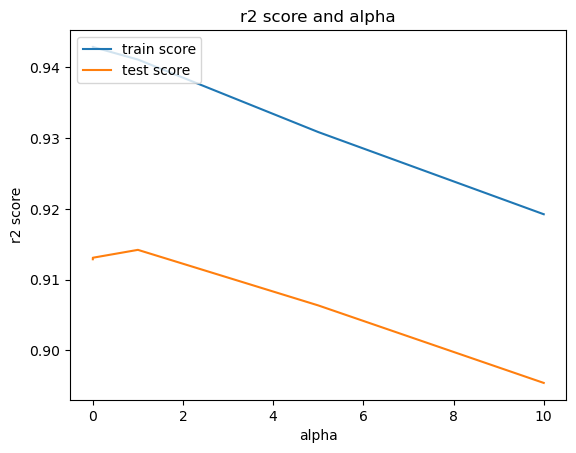

In [179]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [180]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter

# list of alphas to tune
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [181]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018033,0.007439,0.006939,0.001491,0.001,{'alpha': 0.001},-13790.634610,-14775.450986,-15643.934630,-15588.020625,...,-14662.014959,885.017572,3,-11928.755978,-11862.890699,-11764.867534,-11833.545843,-12358.590773,-11949.730165,211.102343
1,0.010638,0.001028,0.006610,0.002232,0.01,{'alpha': 0.01},-13784.808357,-14752.255130,-15604.013552,-15562.394553,...,-14637.905979,878.139775,2,-11926.464799,-11862.883546,-11755.653462,-11834.274567,-12353.086091,-11946.472493,210.581250
2,0.011232,0.001296,0.006140,0.001049,1.0,{'alpha': 1.0},-13709.346854,-14045.675371,-14949.341984,-15453.283172,...,-14321.036212,760.229632,1,-11972.068891,-11944.404181,-11718.386638,-11890.639422,-12251.330793,-11955.365985,172.245786
3,0.010448,0.000796,0.006235,0.000755,5.0,{'alpha': 5.0},-14463.458080,-14454.358754,-14645.610176,-16348.277593,...,-14836.476243,765.148185,4,-13000.720494,-12882.993755,-12824.034450,-12811.575031,-13024.644877,-12908.793721,88.513578
4,0.015771,0.004018,0.006676,0.000914,10.0,{'alpha': 10.0},-15594.933580,-15230.880835,-15151.669122,-17185.958741,...,-15688.652334,763.643866,5,-14098.886914,-13904.291216,-13925.911384,-13873.851419,-14019.300217,-13964.448230,82.938817


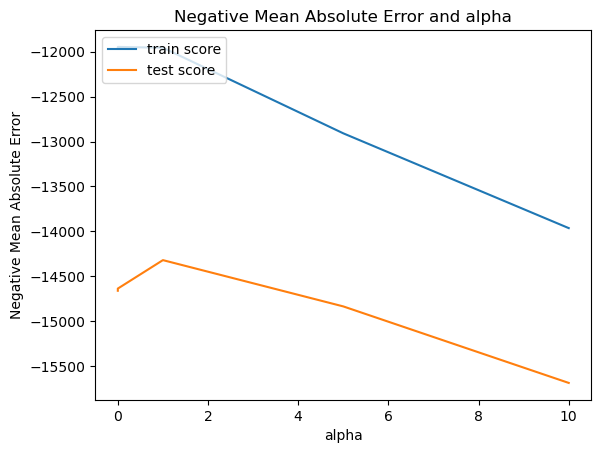

In [182]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [183]:
# model with optimal alpha = 1
# lasso regression
lm = Ridge(alpha=1)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9392476999525955
0.9231948226312643


In [184]:
ridge.fit(X_train, y_train)
ridge.coef_

array([ 5.17810705e+03,  3.11954344e+04,  6.55818914e+04,  4.38983356e+04,
        2.02325383e+04,  4.19034987e+04,  6.07817031e+04,  1.63196413e+03,
       -1.29014691e+04,  1.29756956e+05,  3.60586120e+03,  2.08452492e+04,
        1.03986349e+04, -1.37112051e+04, -1.26215696e+04,  1.03866831e+04,
        2.42451101e+04,  1.21248049e+04,  7.43841048e+03,  9.11524597e+03,
        6.15728811e+03,  8.64787766e+03, -3.19132508e+04, -3.40528294e+04,
        2.77876394e+03,  1.53437167e+04,  3.93427843e+03,  3.13197451e+03,
        1.76475601e+03, -7.99369438e+03, -3.10912421e+03, -1.62279706e+04,
        1.54001673e+04,  3.83214666e+03,  3.06736530e+02,  1.43011669e+03,
        3.12812039e+03, -1.58841502e+04,  4.30019577e+03, -9.48788836e+03,
       -1.25982582e+03,  7.12141477e+03,  8.27061821e+03, -4.44453750e+03,
        2.37479588e+04, -1.11733443e+04, -8.82111374e+03, -1.37348795e+04,
       -5.82795868e+03, -1.40756344e+04,  1.90463510e+04,  7.53473544e+03,
       -4.16783320e+03,  

# Conclusion